In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

# Import TensorFlow
import tensorflow as tf

# Set seeds for reproducibility
np.random.seed(1)
tf.random.set_seed(2)

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime

In [2]:
data = pd.read_csv("D:Car_sales(1).csv")

In [3]:
data.head(5)

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Sales_Date,Power_perf_factor
0,Acura,Integra,16.919,16.360,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2018,58.280150
1,Acura,TL,39.384,19.875,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2019,91.370778
2,Acura,CL,14.114,18.225,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2018,NaN
3,Acura,RL,8.588,29.725,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2019,91.389779
4,Audi,A4,20.397,22.255,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2019,62.777639


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Price_in_thousands   155 non-null    float64
 5   Engine_size          156 non-null    float64
 6   Horsepower           156 non-null    float64
 7   Wheelbase            156 non-null    float64
 8   Width                156 non-null    float64
 9   Length               156 non-null    float64
 10  Curb_weight          155 non-null    float64
 11  Fuel_capacity        156 non-null    float64
 12  Fuel_efficiency      154 non-null    float64
 13  Sales_Date           157 non-null    object 
 14  Power_perf_factor    155 non-null    float64
dtypes: float64(12), object(3)
memory usage: 

In [5]:
data.isna().sum()

Manufacturer            0
Model                   0
Sales_in_thousands      0
__year_resale_value    36
Price_in_thousands      2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Sales_Date              0
Power_perf_factor       2
dtype: int64

In [6]:
data['Sales_Date'] = pd.to_datetime(data['Sales_Date'])
data['Year'] = data['Sales_Date'].dt.year
data['Month'] = data['Sales_Date'].dt.month
data['Day'] = data['Sales_Date'].dt.day

In [7]:
data.head(5)

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Sales_Date,Power_perf_factor,Year,Month,Day
0,Acura,Integra,16.919,16.360,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2018-02-02,58.280150,2018,2,2
1,Acura,TL,39.384,19.875,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,2019-06-03,91.370778,2019,6,3
2,Acura,CL,14.114,18.225,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,2018-01-04,NaN,2018,1,4
3,Acura,RL,8.588,29.725,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2019-03-10,91.389779,2019,3,10
4,Audi,A4,20.397,22.255,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,2019-10-08,62.777639,2019,10,8


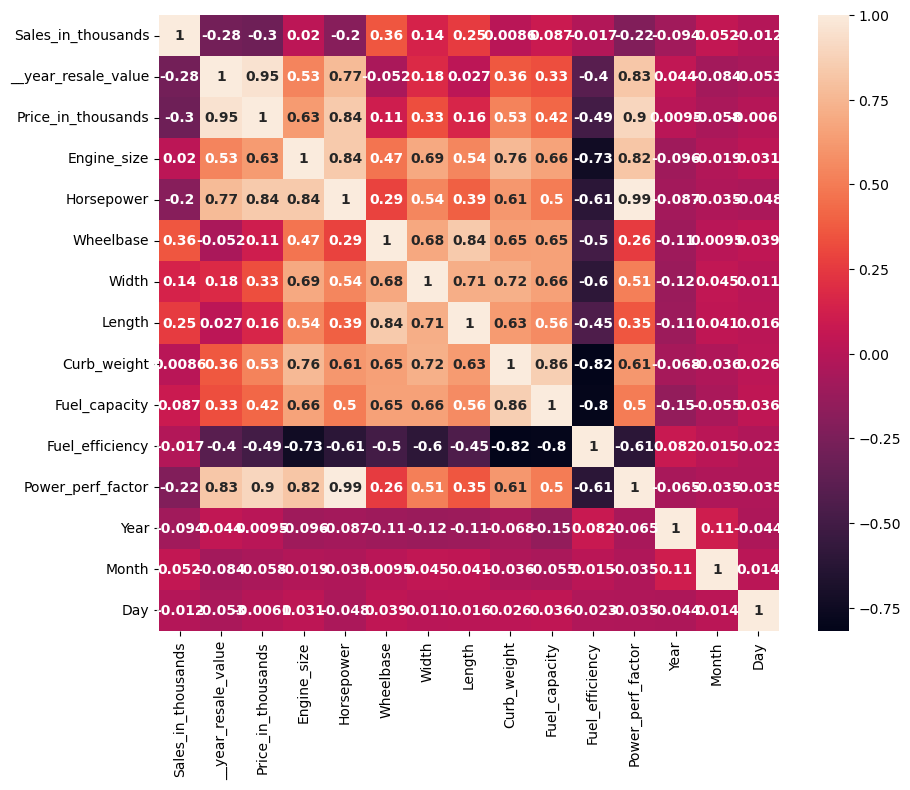

In [8]:
import matplotlib.pyplot as plt

# Perform heatmap of the dataset

DeepAR_heatmap = plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(method='pearson'), annot=True, annot_kws={"weight": "bold"})
plt.show()

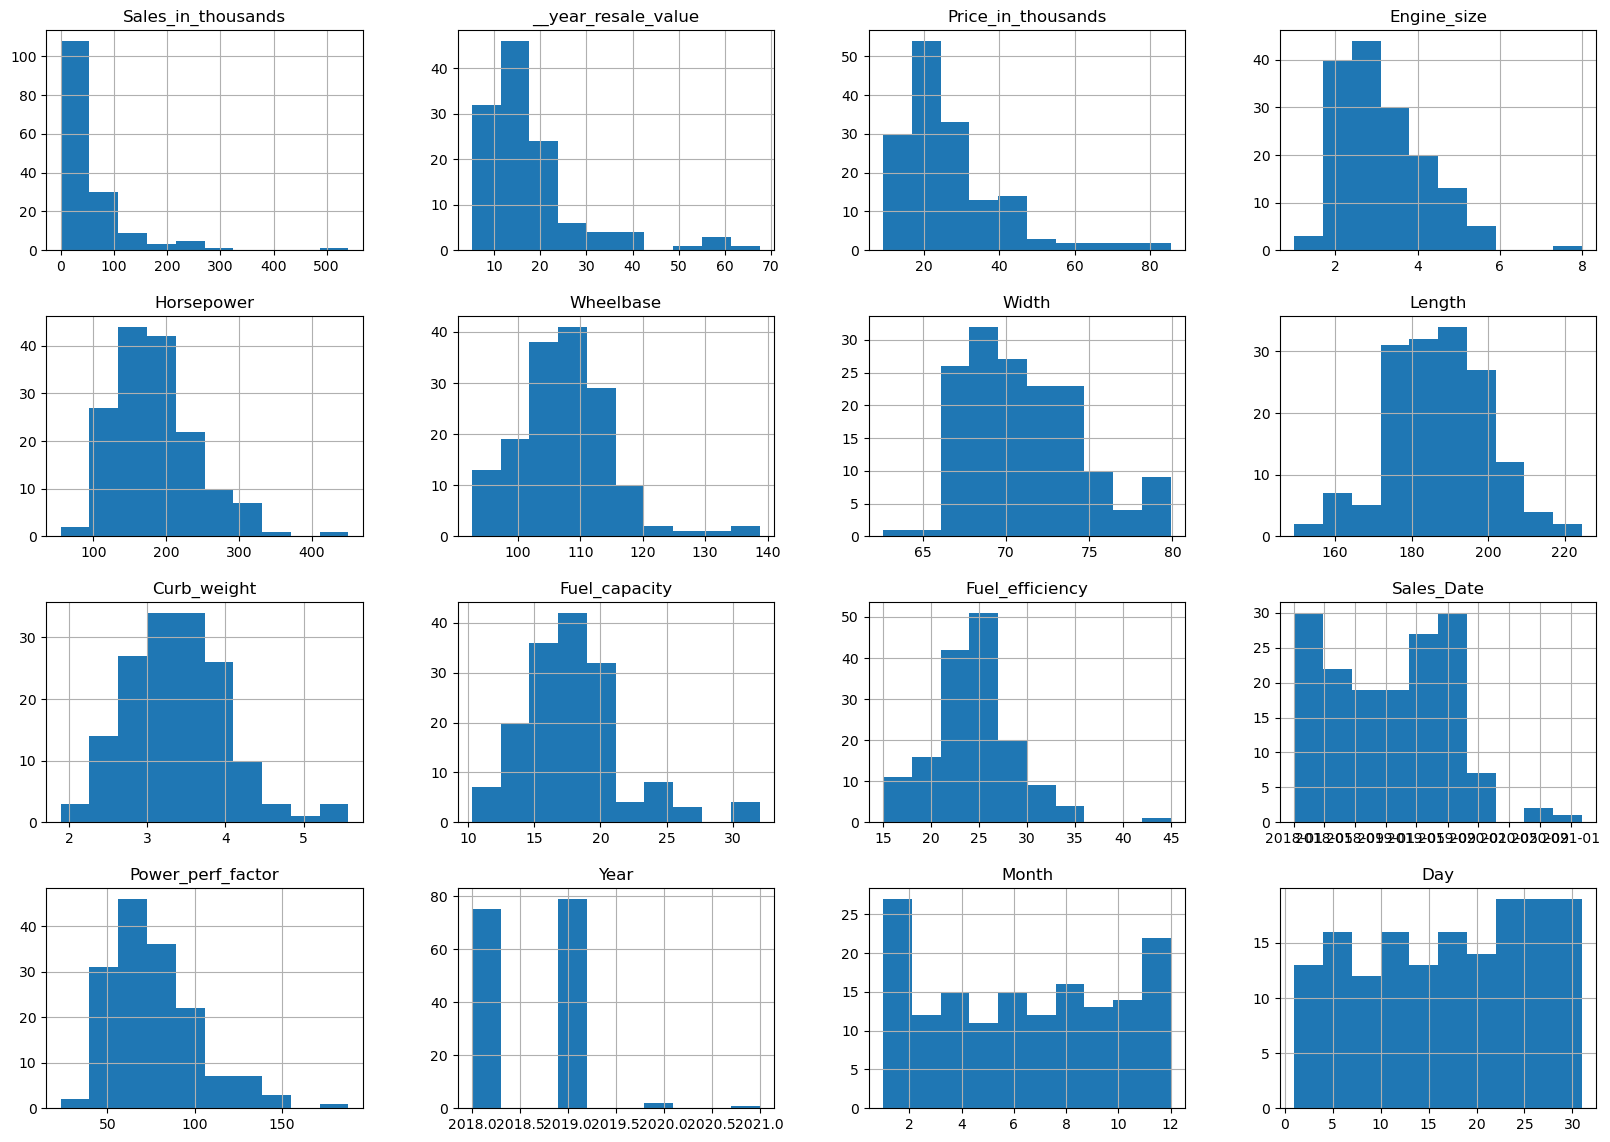

In [9]:
2# Exploring Data Analysis

data_chart = data.hist(figsize=(20,14))
plt.show()

In [10]:
# Set the Total Sales perform by Price_In_Thousands

data['Sales_Date'] = pd.to_datetime(data['Sales_Date'])
weekly_data = data.groupby(['Price_in_thousands', pd.Grouper(key='Sales_Date', freq='W')])['Sales_in_thousands'].sum().reset_index()

In [11]:
mean_total_sales = weekly_data.groupby('Sales_Date')['Sales_in_thousands'].mean().reset_index()
mean_total_sales.rename(columns={'Sales_in_thousands': 'Mean Total Sales'}, inplace=True)

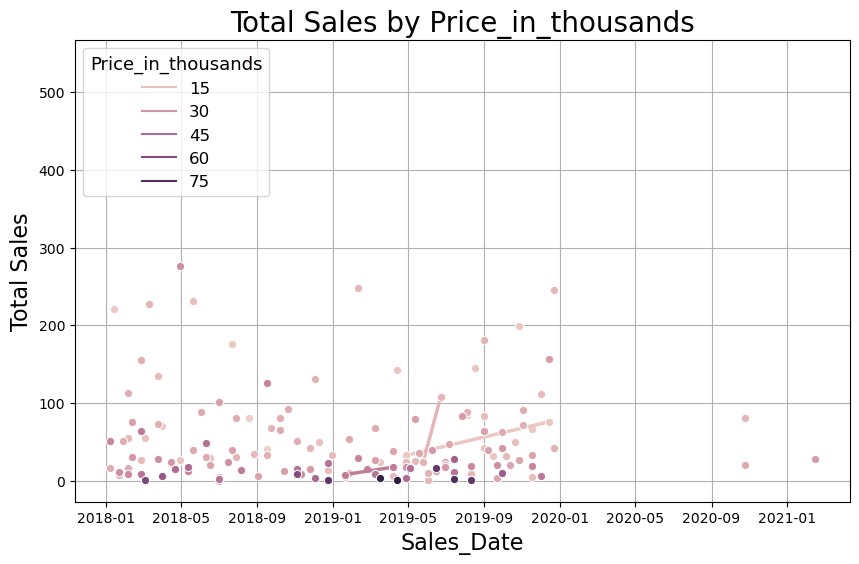

In [12]:
# Plot chart

Total_Sales_scatter = plt.figure(figsize=(10, 6))
sns.lineplot(x='Sales_Date', y='Sales_in_thousands', hue='Price_in_thousands', data=weekly_data, marker='o', linewidth=2.5)
plt.title('Total Sales by Price_in_thousands', fontsize=20)
plt.xlabel('Sales_Date', fontsize=16)
plt.ylabel('Total Sales', fontsize=16)
plt.grid(True)
plt.legend(title='Price_in_thousands', title_fontsize='13', loc='upper left', fontsize='12')
plt.show()

In [13]:
def preprocess_lstm(sequence, n_steps,n_features):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix >= len(sequence):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
        
    X = np.array(X)
    y = np.array(y)

    X = X.reshape((X.shape[0], X.shape[1], n_features))
    return X, y

In [14]:
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM, Flatten
from keras.layers import ConvLSTM2D
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [15]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [16]:
Sales_thousands = data['Sales_in_thousands']
values = Sales_thousands.values
training_data_len = math.ceil(len(values)* 0.7)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(values.reshape(-1,1))
train_data = scaled_data[0: training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [17]:
test_data = scaled_data[training_data_len-60: , : ]
x_test = []
y_test = values[training_data_len:]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [18]:
model = keras.Sequential()
model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(layers.LSTM(100, return_sequences=False))
model.add(layers.Dense(25))
model.add(layers.Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 25)                2525      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 123751 (483.40 KB)
Trainable params: 123751 (483.40 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size= 1, epochs=3)

Epoch 1/3
50/50 [==============================] - 3s 10ms/step - loss: 0.0044
Epoch 2/3
50/50 [==============================] - 1s 11ms/step - loss: 0.0040
Epoch 3/3
50/50 [==============================] - 1s 10ms/step - loss: 0.0035


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [21]:
3# Set Data Value to numeric for prediction

data["Sales_in_thousands"]=pd.to_numeric(data.Sales_in_thousands,errors='coerce')
data = data.dropna()
trainData = data.iloc[:,4:5].values

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117 entries, 0 to 149
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Manufacturer         117 non-null    object        
 1   Model                117 non-null    object        
 2   Sales_in_thousands   117 non-null    float64       
 3   __year_resale_value  117 non-null    float64       
 4   Price_in_thousands   117 non-null    float64       
 5   Engine_size          117 non-null    float64       
 6   Horsepower           117 non-null    float64       
 7   Wheelbase            117 non-null    float64       
 8   Width                117 non-null    float64       
 9   Length               117 non-null    float64       
 10  Curb_weight          117 non-null    float64       
 11  Fuel_capacity        117 non-null    float64       
 12  Fuel_efficiency      117 non-null    float64       
 13  Sales_Date           117 non-null  

In [23]:
# Using MinMaxScaler for scaling the data

sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(117, 1)

In [24]:
# Trainning and Testing

X_train = []
y_train = []

for i in range (60,117): #60 : timestep // 1149 : Length of the data
  X_train.append(trainData[i-60:i,0])
  y_train.append(trainData[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)

In [25]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(57, 60, 1)

In [26]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units = 1))
model.compile(optimizer='adam',loss="mean_squared_error")

In [27]:
hist = model.fit(X_train, y_train, epochs = 25, batch_size = 32, verbose=2)

Epoch 1/25
2/2 - 5s - loss: 0.0923 - 5s/epoch - 2s/step
Epoch 2/25
2/2 - 0s - loss: 0.0615 - 162ms/epoch - 81ms/step
Epoch 3/25
2/2 - 0s - loss: 0.0493 - 159ms/epoch - 79ms/step
Epoch 4/25
2/2 - 0s - loss: 0.0563 - 166ms/epoch - 83ms/step
Epoch 5/25
2/2 - 0s - loss: 0.0550 - 170ms/epoch - 85ms/step
Epoch 6/25
2/2 - 0s - loss: 0.0509 - 168ms/epoch - 84ms/step
Epoch 7/25
2/2 - 0s - loss: 0.0547 - 172ms/epoch - 86ms/step
Epoch 8/25
2/2 - 0s - loss: 0.0526 - 171ms/epoch - 85ms/step
Epoch 9/25
2/2 - 0s - loss: 0.0508 - 170ms/epoch - 85ms/step
Epoch 10/25
2/2 - 0s - loss: 0.0508 - 170ms/epoch - 85ms/step
Epoch 11/25
2/2 - 0s - loss: 0.0505 - 163ms/epoch - 81ms/step
Epoch 12/25
2/2 - 0s - loss: 0.0527 - 163ms/epoch - 81ms/step
Epoch 13/25
2/2 - 0s - loss: 0.0507 - 163ms/epoch - 81ms/step
Epoch 14/25
2/2 - 0s - loss: 0.0493 - 164ms/epoch - 82ms/step
Epoch 15/25
2/2 - 0s - loss: 0.0507 - 165ms/epoch - 82ms/step
Epoch 16/25
2/2 - 0s - loss: 0.0523 - 159ms/epoch - 79ms/step
Epoch 17/25
2/2 - 0s -

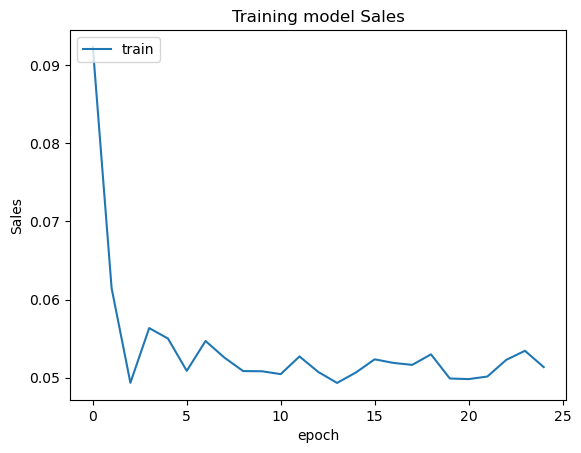

In [28]:
#Plot the Train and Test model

Train_Test_model = plt.plot(hist.history['loss'])
plt.title('Training model Sales')
plt.ylabel('Sales')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [29]:
# Prepare model for each Sales_In_Thousands

testData = pd.read_csv("D:Car_sales(2).csv")
testData["Sales_in_thousands"]=pd.to_numeric(testData.Sales_in_thousands,errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values
inputSaling = testData.iloc[:,0:].values
inputSaling_scaled = sc.transform(inputSaling)
inputSaling_scaled.shape
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length) :
  X_test.append(inputSaling_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test =np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(57, 60, 1)

In [30]:
y_pred = model.predict(X_test)
y_pred

2/2 [==============================] - 1s 19ms/step


array([[0.21747686],
       [0.21700172],
       [0.21629518],
       [0.21539922],
       [0.21439202],
       [0.21349593],
       [0.21290232],
       [0.21272825],
       [0.21299161],
       [0.2136317 ],
       [0.21453264],
       [0.21560417],
       [0.21679284],
       [0.21805444],
       [0.21932678],
       [0.22053081],
       [0.22157492],
       [0.22241205],
       [0.22298713],
       [0.22320391],
       [0.22293667],
       [0.22209139],
       [0.22094049],
       [0.21982642],
       [0.21900888],
       [0.2186381 ],
       [0.2187516 ],
       [0.21935192],
       [0.22032061],
       [0.22151518],
       [0.22283214],
       [0.2242332 ],
       [0.22568151],
       [0.22709714],
       [0.22840151],
       [0.22952011],
       [0.23037522],
       [0.23092715],
       [0.2311569 ],
       [0.23100653],
       [0.23033243],
       [0.22904734],
       [0.22742538],
       [0.2258162 ],
       [0.22450246],
       [0.2236645 ],
       [0.22333962],
       [0.223

In [31]:
predicted_price = sc.inverse_transform(y_pred)

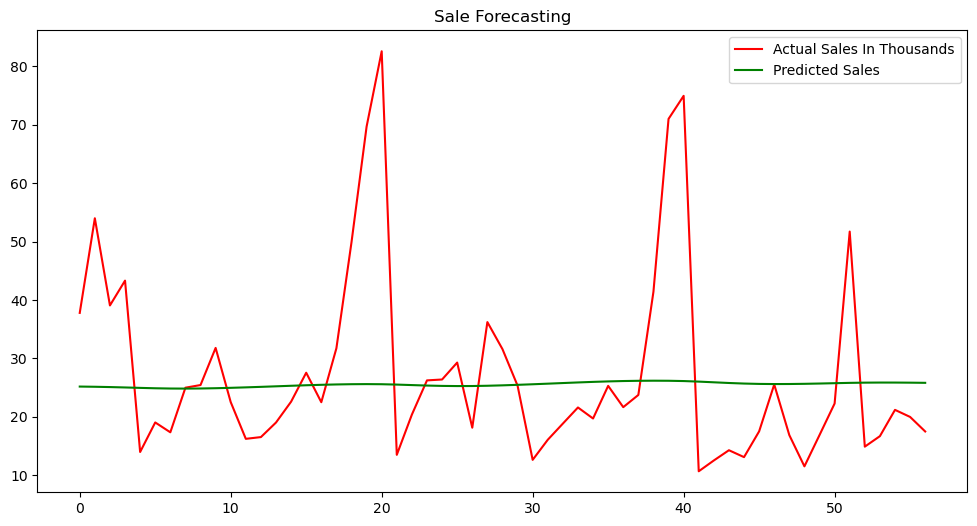

In [32]:
Actual_Predicted_Model = plt.figure(figsize=(12, 6))
plt.plot(y_test, color = 'red', label = 'Actual Sales In Thousands')
plt.plot(predicted_price, color = 'green', label = 'Predicted Sales')
plt.title('Sale Forecasting')
plt.xlabel
plt.ylabel
plt.legend()
plt.show()

In [33]:
def preprocess_lstm(sequence, n_steps,n_features):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix >= len(sequence):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
        
    X = np.array(X)
    y = np.array(y)

    X = X.reshape((X.shape[0], X.shape[1], n_features))
    return X, y

Text(0.5, 1.0, 'Sales_in_thousands')

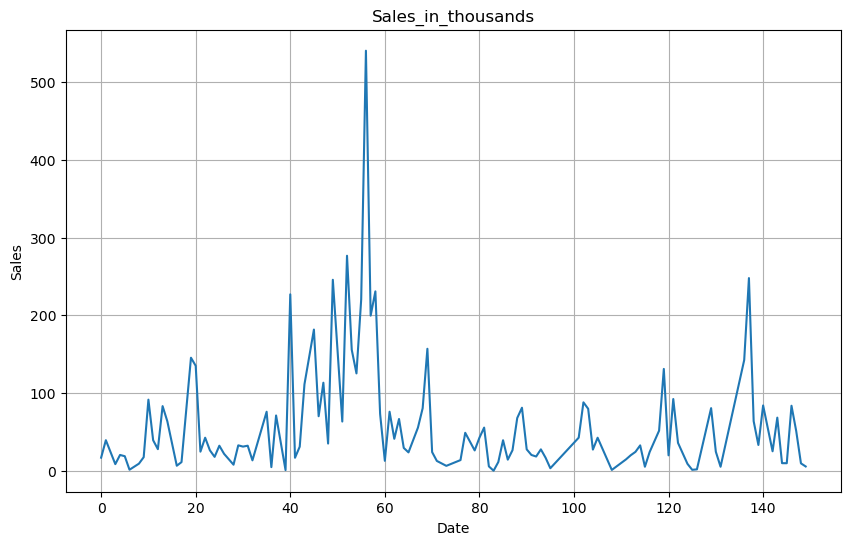

In [34]:
data_Sales = data['Sales_in_thousands']

plt.figure(figsize=(10,6))
plt.grid()
plt.plot(data_Sales)
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales_in_thousands')

In [35]:
def test_stationarity(timeseries):
    '''
    Input: timeseries (dataframe): timeseries for which we want to study the stationarity
    '''
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(20).mean()
    rolstd = timeseries.rolling(20).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value',\
                                             '#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

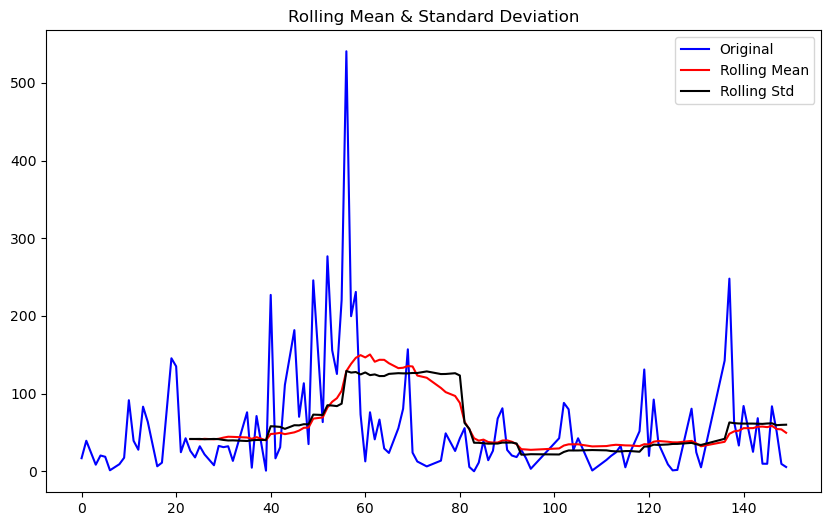

Results of Dickey-Fuller Test:


NameError: name 'adfuller' is not defined

In [36]:
Roll_Standard_Model = plt.figure(figsize = (10,6))
test_stationarity(data_Sales.head(2000))

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [ ]:
result = seasonal_decompose(data_Sales, model='multiplicative',period=28)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

In [37]:
import seaborn as sns
import pandas as pd
import panel as pn


In [38]:
manufacturers = ['Toyota', 'Audi', 'Chevrolet', 'Dodge', 'Ford', 'Lexus']

In [39]:
filtered_data = data[data['Manufacturer'].isin(manufacturers)]


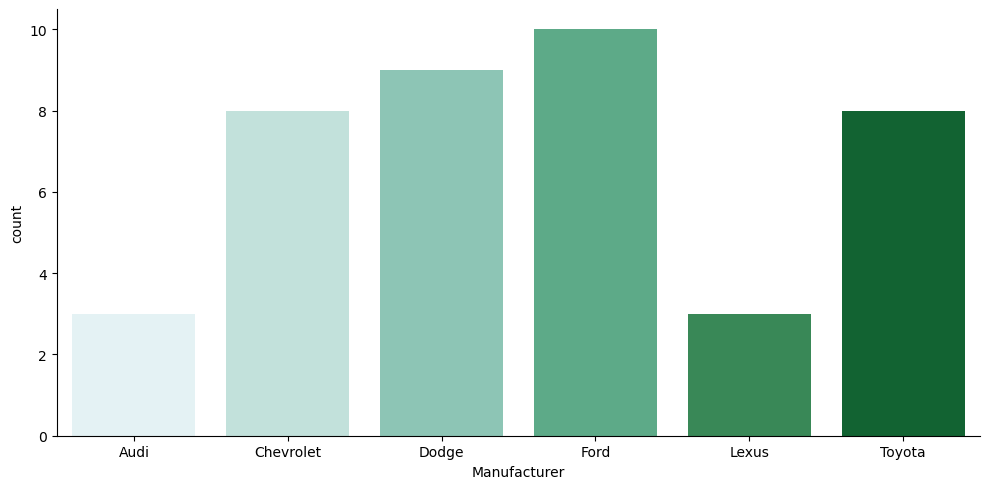

In [40]:
count_LSTM = sns.catplot(x='Manufacturer', kind='count', palette='BuGn', data=filtered_data, aspect=2)


Text(0.5, 1.0, 'Transformed data')

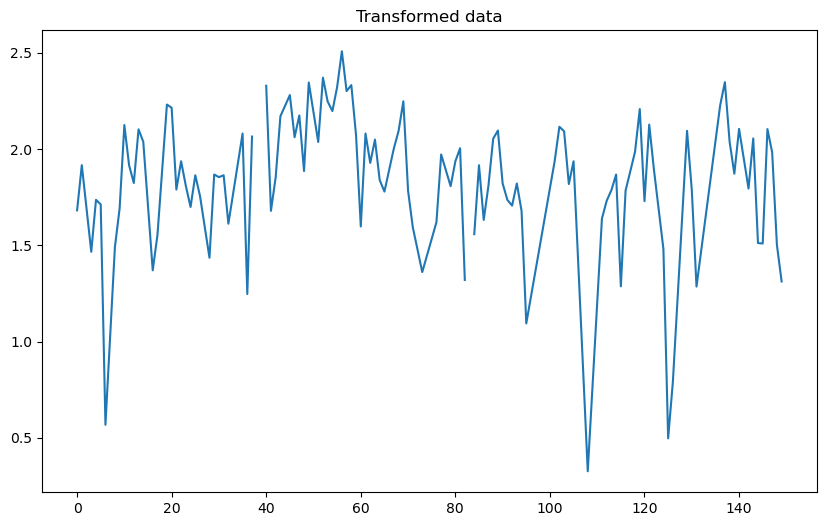

In [41]:
data_Sales_log = data_Sales.apply(np.log)
data_Sales_tf = data_Sales_log.apply(np.sqrt)

plt.figure(figsize = (10,6))
plt.plot(data_Sales_tf)
plt.title('Transformed data')

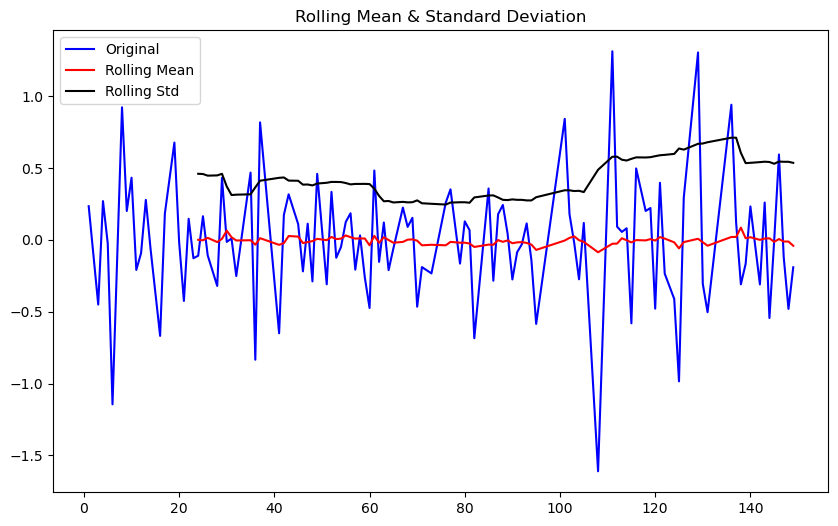

Results of Dickey-Fuller Test:


NameError: name 'adfuller' is not defined

In [42]:
data_Sales_shift = data_Sales_tf - data_Sales_tf.shift()

data_Sales_shift.dropna(inplace=True)
plt.figure(figsize = (10,6))
test_stationarity(data_Sales_shift)

In [43]:
def preprocess_lstm(sequence, n_steps,n_features):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix >= len(sequence):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
        
    X = np.array(X)
    y = np.array(y)

    X = X.reshape((X.shape[0], X.shape[1], n_features))
    return X, y

In [44]:
nb_days = 30

n_features = 1

X, y = preprocess_lstm(data_Sales_shift.to_numpy(), nb_days, n_features)

In [45]:
test_days = 60

X_train, y_train = X[:-test_days], y[:-test_days]
X_test, y_test = X[-test_days:], y[-test_days:]

In [46]:
train_original = data_Sales.iloc[:-test_days]
test_original = data_Sales.iloc[-test_days:]

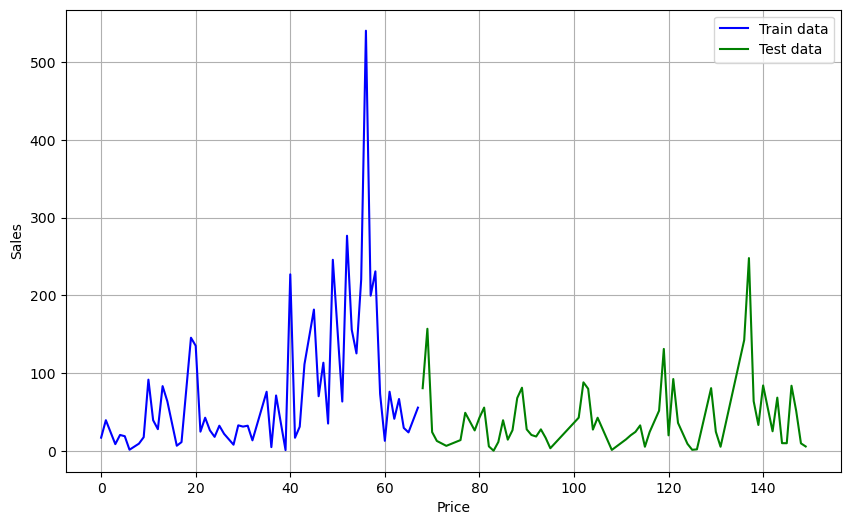

In [47]:
Train_Test_Model_2 = plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Price')
plt.ylabel('Sales')
plt.plot(train_original, 'b', label='Train data')
plt.plot(test_original, 'g', label='Test data')
plt.legend()

In [48]:
def vanilla_LSTM():
    model = Sequential()    
    model.add(LSTM(units=50, input_shape=(nb_days, n_features)))
    model.add(Dense(1))
    return model

In [49]:
model = vanilla_LSTM()
model.summary()
model.compile(optimizer='adam', 
              loss='mean_squared_error',
              metrics=[tf.keras.metrics.MeanAbsoluteError()])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 50)                10400     
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10451 (40.82 KB)
Trainable params: 10451 (40.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [50]:
print("Evaluate on test data")
results = model.evaluate(X_test, y_test, batch_size=32)
print("Test MSE:", results[0])
print("Test MAE:", results[1])

Evaluate on test data
2/2 [==============================] - 0s 5ms/step - loss: 0.2177 - mean_absolute_error: 0.3387
Test MSE: 0.21772721409797668
Test MAE: 0.3387114703655243


In [51]:
y_pred = model.predict(X_test)


2/2 [==============================] - 0s 3ms/step


In [52]:
pred_data = pd.DataFrame(y_pred[:,0], test_original.index,columns=['Sales_Date'])

In [ ]:
pred_data['Sales_in_thousands'] = pred_data['Sales_in_thousands'] + data_Sales_tf.shift().values[-test_days:] 

pred_data = pred_data.apply(np.square)
pred_data = pred_data.apply(np.exp)


plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Sales_Date')
plt.ylabel('Sales_in_thousands')
plt.plot(test_original,'b',label='Actual Sales')
plt.plot(pred_data, 'orange',label='Predicted prices')
plt.title('Forecasting Sales on 90 days by Sales_In_Thousands')

plt.legend()

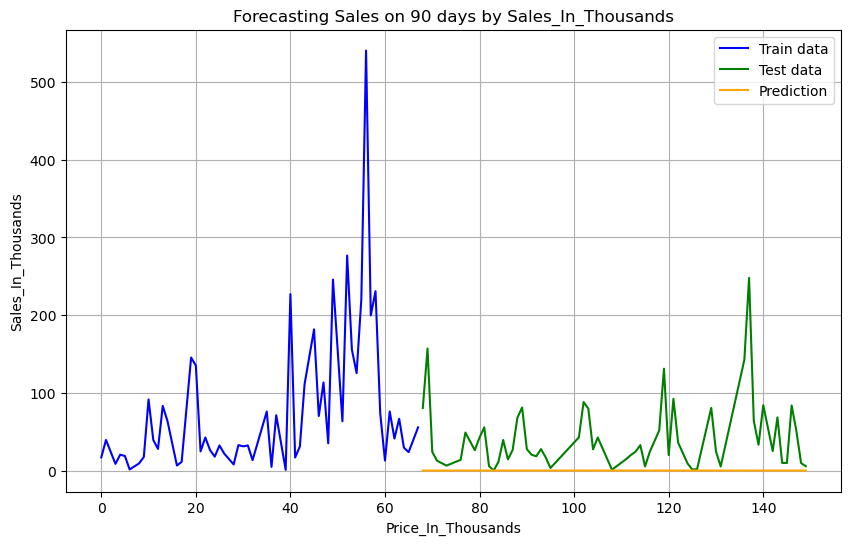

In [57]:
Forecasting_Next_90days_Model = plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Price_In_Thousands')
plt.ylabel('Sales_In_Thousands')
plt.plot(train_original, 'b', label='Train data')
plt.plot(test_original, 'g', label='Test data')
plt.plot(pred_data, 'orange', label='Prediction')
plt.title('Forecasting Sales on 90 days by Sales_In_Thousands')
plt.legend()

In [58]:
import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

# Import TensorFlow
import tensorflow as tf

# Set seeds for reproducibility
np.random.seed(1)
tf.random.set_seed(2)

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime

In [59]:
data.head(5)

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Sales_Date,Power_perf_factor,Year,Month,Day
0,Acura,Integra,16.919,16.360,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2018-02-02,58.280150,2018,2,2
1,Acura,TL,39.384,19.875,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,2019-06-03,91.370778,2019,6,3
3,Acura,RL,8.588,29.725,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2019-03-10,91.389779,2019,3,10
4,Audi,A4,20.397,22.255,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,2019-10-08,62.777639,2019,10,8
5,Audi,A6,18.780,23.555,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2019-08-09,84.565105,2019,8,9


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117 entries, 0 to 149
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Manufacturer         117 non-null    object        
 1   Model                117 non-null    object        
 2   Sales_in_thousands   117 non-null    float64       
 3   __year_resale_value  117 non-null    float64       
 4   Price_in_thousands   117 non-null    float64       
 5   Engine_size          117 non-null    float64       
 6   Horsepower           117 non-null    float64       
 7   Wheelbase            117 non-null    float64       
 8   Width                117 non-null    float64       
 9   Length               117 non-null    float64       
 10  Curb_weight          117 non-null    float64       
 11  Fuel_capacity        117 non-null    float64       
 12  Fuel_efficiency      117 non-null    float64       
 13  Sales_Date           117 non-null  

In [61]:
data.isna().sum()

Manufacturer           0
Model                  0
Sales_in_thousands     0
__year_resale_value    0
Price_in_thousands     0
Engine_size            0
Horsepower             0
Wheelbase              0
Width                  0
Length                 0
Curb_weight            0
Fuel_capacity          0
Fuel_efficiency        0
Sales_Date             0
Power_perf_factor      0
Year                   0
Month                  0
Day                    0
dtype: int64

In [62]:
data['Sales_Date'] = pd.to_datetime(data['Sales_Date'])

In [63]:
data.sort_values('Sales_Date', inplace=True)

In [64]:
def create_lag_features(data, lag):
    for i in range(1, lag+1):
        data[f'lag_{i}'] = data['Sales_in_thousands'].shift(i)
    return data

In [65]:
lag = 5


In [66]:
data = create_lag_features(data, lag)


In [67]:
data.dropna(inplace=True)


In [68]:
train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:]

In [69]:
X_train, y_train = train_data.drop(['Sales_Date', 'Sales_in_thousands'], axis=1), train_data['Sales_in_thousands']
X_test, y_test = test_data.drop(['Sales_Date', 'Sales_in_thousands'], axis=1), test_data['Sales_in_thousands']

In [70]:
import xgboost as xgb
xgb.config_context(enable_categorical=True)

In [71]:
data['Manufacturer'] = data['Manufacturer'].astype('category')
data['Model'] = data['Model'].astype('category')


In [72]:
lag = 5

In [73]:
data = create_lag_features(data, lag)


In [74]:
data.dropna(inplace=True)


In [75]:
train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:]

In [76]:
X_train, y_train = train_data.drop(['Sales_Date', 'Sales_in_thousands'], axis=1), train_data['Sales_in_thousands']
X_test, y_test = test_data.drop(['Sales_Date', 'Sales_in_thousands'], axis=1), test_data['Sales_in_thousands']

In [77]:
data['Manufacturer'] = data['Manufacturer'].astype('category')
data['Model'] = data['Model'].astype('category')


In [78]:
dtrain = xgb.DMatrix(X_train, label=y_train, enable_categorical=True)
dtest = xgb.DMatrix(X_test, label=y_test, enable_categorical=True)

In [79]:
params = {
    'objective': 'reg:squarederror',
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'eval_metric': 'rmse'
    }

In [80]:
num_rounds = 100
model = xgb.train(params, dtrain, num_rounds)

In [81]:
y_pred = model.predict(dtest)

In [82]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

RMSE: 62.20184545592978


In [83]:
data['Sales_Date'] = pd.to_datetime(data['Sales_Date'])
data.set_index('Sales_Date', inplace=True)
y_pred_series = pd.Series(y_pred, index=X_test.index)

In [84]:
import xgboost as xgb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

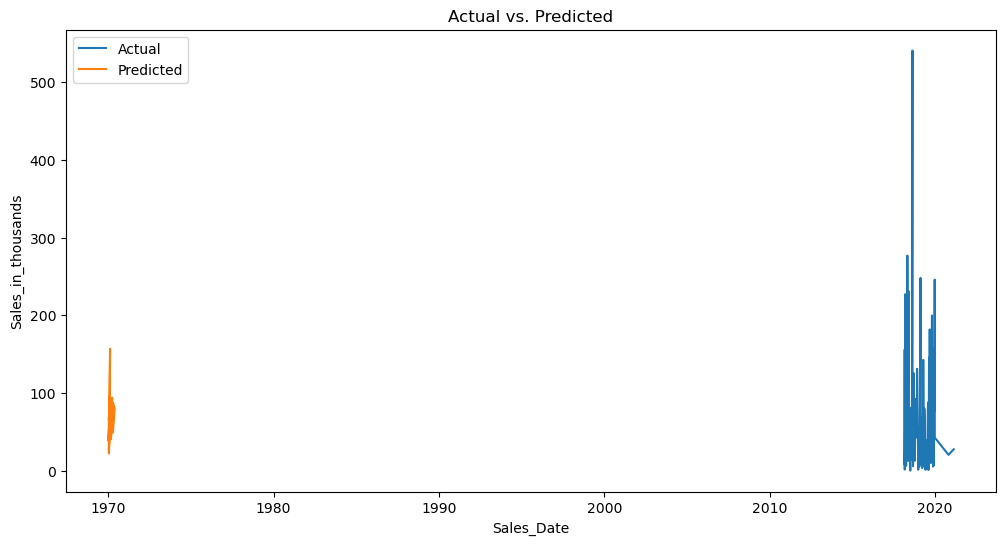

In [85]:
Actual_Predict_XG = plt.figure(figsize=(12, 6))
plt.plot(data['Sales_in_thousands'], label='Actual')
plt.plot(y_pred_series, label='Predicted')
plt.xlabel('Sales_Date')
plt.ylabel('Sales_in_thousands')
plt.title('Actual vs. Predicted')
plt.legend()
plt.show()

In [86]:
data = data[['Sales_in_thousands', '__year_resale_value', 'Price_in_thousands']]

In [87]:
X = data[['Sales_in_thousands', '__year_resale_value']]
y = data['Price_in_thousands']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)


In [88]:
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor

In [89]:
# Create an imputer object to impute missing values with the mean
imputer = SimpleImputer(strategy='mean')

In [90]:
y_train_array = y_train.values.reshape(-1, 1)

In [91]:
y_train_imputed = imputer.fit_transform(y_train_array)

In [92]:
y_train_imputed = y_train_imputed.flatten()

In [93]:
model = XGBRegressor(random_state=123)
model.fit(X_train, y_train_imputed)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=123, ...)

In [94]:
y_pred = model.predict(X_test)

In [95]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [96]:
nan_mask = np.isnan(y_test) | np.isnan(y_pred)
y_test_cleaned = y_test[~nan_mask]
y_pred_cleaned = y_pred[~nan_mask]

In [97]:
mse = mean_squared_error(y_test_cleaned, y_pred_cleaned)
print("Mean Squared Error:", mse)

Mean Squared Error: 40.11931475028331


In [98]:
import matplotlib.pyplot as plt

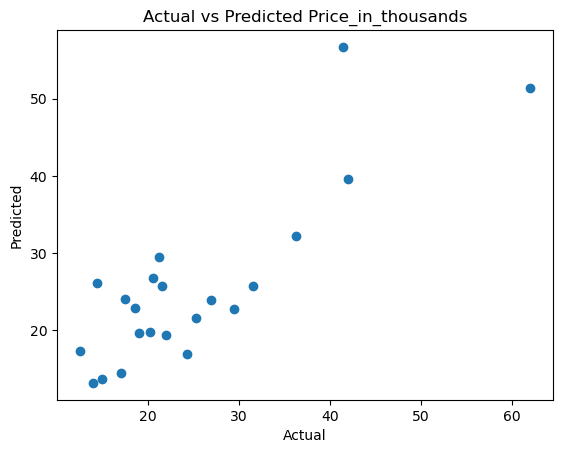

In [99]:
# Plotting Actual vs Predicted
Actual_Predict_scatter = plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Price_in_thousands')
plt.show()

In [100]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [101]:
data = pd.read_csv('D:Car_sales(1).csv')

In [102]:
data

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Sales_Date,Power_perf_factor
0,Acura,Integra,16.919,16.360,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2018,58.280150
1,Acura,TL,39.384,19.875,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2019,91.370778
2,Acura,CL,14.114,18.225,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2018,NaN
3,Acura,RL,8.588,29.725,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2019,91.389779
4,Audi,A4,20.397,22.255,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2019,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,NaN,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2019,66.498812
153,Volvo,S70,15.245,NaN,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2018,70.654495
154,Volvo,V70,17.531,NaN,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2019,71.155978
155,Volvo,C70,3.493,NaN,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2019,101.623357


In [103]:
X = data[['Price_in_thousands']]
y = data['Sales_in_thousands']

In [104]:
data

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Sales_Date,Power_perf_factor
0,Acura,Integra,16.919,16.360,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2018,58.280150
1,Acura,TL,39.384,19.875,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2019,91.370778
2,Acura,CL,14.114,18.225,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2018,NaN
3,Acura,RL,8.588,29.725,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2019,91.389779
4,Audi,A4,20.397,22.255,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2019,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,NaN,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2019,66.498812
153,Volvo,S70,15.245,NaN,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2018,70.654495
154,Volvo,V70,17.531,NaN,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2019,71.155978
155,Volvo,C70,3.493,NaN,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2019,101.623357


In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [106]:
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [107]:
next_90_days = pd.date_range(start=data['Sales_Date'].iloc[-1], periods=90, freq='D')  # Assuming your data has a 'date' column
next_90_days_data = pd.DataFrame({'Sales_Date': next_90_days})
next_90_days_data['Price_in_thousands'] = 21.5
next_90_days_data['__year_resale_value'] = 16.36

In [108]:
next_90_days_data = next_90_days_data[['Price_in_thousands']]

In [109]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split

In [110]:
predictions = model.predict(next_90_days_data)

In [111]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt

In [112]:
model = xgb.XGBRegressor()
model.fit(X, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [113]:
forecast = pd.DataFrame({'Sales_in_thousands': next_90_days, 'Sales_Date': predictions})

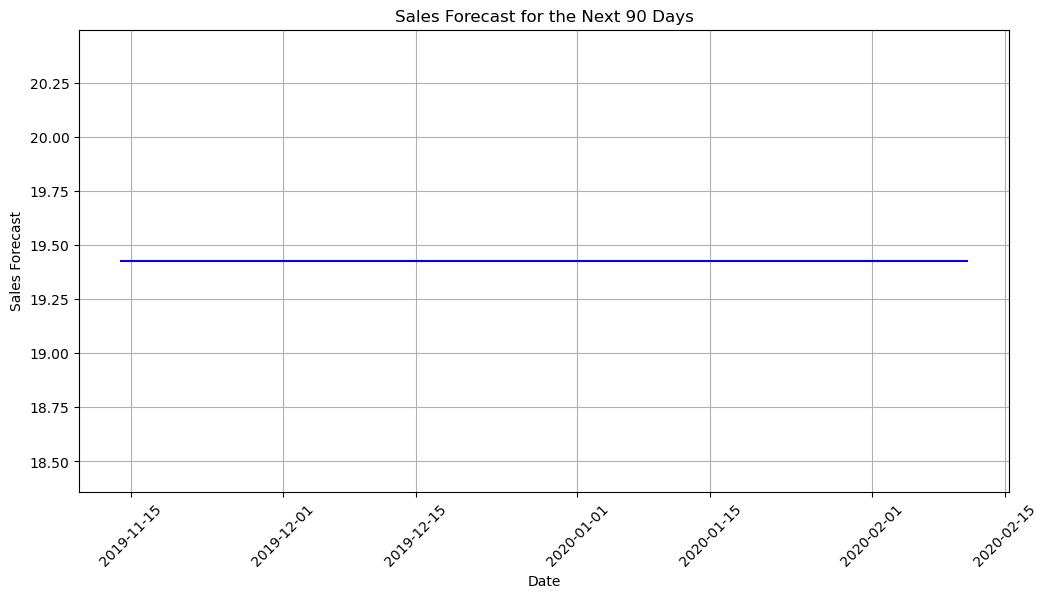

In [114]:
plt.figure(figsize=(12, 6))
plt.plot(forecast['Sales_in_thousands'], forecast['Sales_Date'], color='blue')
plt.xlabel('Date')
plt.ylabel('Sales Forecast')
plt.title('Sales Forecast for the Next 90 Days')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [115]:
# DASHBOARD
import pandas as pd
import numpy as np
import panel as pn
pn.extension('tabulator')

import hvplot.pandas

In [116]:
if 'data' not in pn.state.cache.keys():

    df = pd.read_csv("D:Car_sales(1).csv")

    pn.state.cache['data'] = df.copy()

else: 

    df = pn.state.cache['data']

In [117]:
df

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Sales_Date,Power_perf_factor
0,Acura,Integra,16.919,16.360,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2018,58.280150
1,Acura,TL,39.384,19.875,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2019,91.370778
2,Acura,CL,14.114,18.225,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2018,NaN
3,Acura,RL,8.588,29.725,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2019,91.389779
4,Audi,A4,20.397,22.255,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2019,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,NaN,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2019,66.498812
153,Volvo,S70,15.245,NaN,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2018,70.654495
154,Volvo,V70,17.531,NaN,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2019,71.155978
155,Volvo,C70,3.493,NaN,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2019,101.623357


In [118]:
df[df['Manufacturer'] == 'Chevrolet']

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Sales_Date,Power_perf_factor
19,Chevrolet,Cavalier,145.519,9.250,13.260,2.2,115.0,104.1,67.9,180.9,2.676,14.3,27.0,8/17/2019,46.363347
20,Chevrolet,Malibu,135.126,11.225,16.535,3.1,170.0,107.0,69.4,190.4,3.051,15.0,25.0,3/19/2018,67.314462
21,Chevrolet,Lumina,24.629,10.310,18.890,3.1,175.0,107.5,72.5,200.9,3.330,16.6,25.0,5/24/2019,69.991396
22,Chevrolet,Monte Carlo,42.593,11.525,19.390,3.4,180.0,110.5,72.7,197.9,3.340,17.0,27.0,12/22/2019,72.030917
23,Chevrolet,Camaro,26.402,13.025,24.340,3.8,200.0,101.1,74.1,193.2,3.500,16.8,25.0,10/23/2019,81.118543
24,Chevrolet,Corvette,17.947,36.225,45.705,5.7,345.0,104.5,73.6,179.7,3.210,19.1,22.0,5/12/2018,141.141150
25,Chevrolet,Prizm,32.299,9.125,13.960,1.8,120.0,97.1,66.7,174.3,2.398,13.2,33.0,9/11/2019,48.297636
26,Chevrolet,Metro,21.855,5.160,9.235,1.0,55.0,93.1,62.6,149.4,1.895,10.3,45.0,4/13/2018,23.276272
27,Chevrolet,Impala,107.995,NaN,18.890,3.4,180.0,110.5,73.0,200.0,3.389,17.0,27.0,6/18/2019,71.838039


In [119]:
df[df['Manufacturer'] == 'Toyota']

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Sales_Date,Power_perf_factor
136,Toyota,Corolla,142.535,10.025,13.108,1.8,120.0,97.0,66.7,174.0,2.420,13.2,33.0,4/11/2019,47.968972
137,Toyota,Camry,247.994,13.245,17.518,2.2,133.0,105.2,70.1,188.5,2.998,18.5,27.0,2/10/2019,54.372420
138,Toyota,Avalon,63.849,18.140,25.545,3.0,210.0,107.1,71.7,191.9,3.417,18.5,26.0,8/31/2019,84.911898
139,Toyota,Celica,33.269,15.445,16.875,1.8,140.0,102.4,68.3,170.5,2.425,14.5,31.0,12/29/2018,56.496030
140,Toyota,Tacoma,84.087,9.575,11.528,2.4,142.0,103.3,66.5,178.7,2.580,15.1,23.0,8/1/2019,55.297117
141,Toyota,Sienna,65.119,NaN,22.368,3.0,194.0,114.2,73.4,193.5,3.759,20.9,22.0,10/5/2018,78.027219
142,Toyota,RAV4,25.106,13.325,16.888,2.0,127.0,94.9,66.7,163.8,2.668,15.3,27.0,5/6/2019,51.955109
143,Toyota,4Runner,68.411,19.425,22.288,2.7,150.0,105.3,66.5,183.3,3.440,18.5,23.0,3/7/2019,62.355577
144,Toyota,Land Cruiser,9.835,34.080,51.728,4.7,230.0,112.2,76.4,192.5,5.115,25.4,15.0,9/25/2019,102.528984


In [120]:
df = df.fillna(0)
df['__year_resale_value'] = np.where(df['Power_perf_factor']!= 0, df['Price_in_thousands']/ df['Power_perf_factor'], 0)

In [121]:
# Make DataFrame Pipeline Interactive
idf = df.interactive()

In [122]:
# Define Panel widgets
__year_resale_value = pn.widgets.IntSlider(name='Sale_Year', start=1, end=100, step=5, value=1850)
__year_resale_value

IntSlider(end=100, name='Sale_Year', start=1, step=5, value=1850)

In [123]:
Sales_Year = pn.widgets.RadioButtonGroup(
    name='Y axis', 
    options=['Price_in_thousands', 'Engine_size',],
    button_type='success'
)

In [124]:
continents = ['Acura', 'Audi', 'BMW', 'Buick', 'Cadillac', 'Chevrolet', 'Chrysler', 'Dodge']

Sales_pipeline = (
    idf[
        (idf.Sales_in_thousands <= __year_resale_value) &
        (idf.Manufacturer.isin(continents))
    ]
    .groupby(['Manufacturer', 'Sales_in_thousands'])[Sales_Year].mean()
    .to_frame()
    .reset_index()
    .sort_values(by='Sales_in_thousands')  
    .reset_index(drop=True)
)

In [125]:
Sales_pipeline

In [126]:
Sales_plot = Sales_pipeline.hvplot(x = 'Sales_in_thousands', by='Manufacturer', y=Sales_Year,line_width=2, title="Sales emission by continent")
Sales_plot

In [127]:
Sales_table = Sales_pipeline.pipe(pn.widgets.Tabulator, pagination='remote', page_size = 10, sizing_mode='stretch_width') 
Sales_table

In [128]:
Sales_vs_price_thousands_scatterplot_pipeline = (
    idf[
        (idf.Sales_in_thousands <= __year_resale_value) &
        (~ (idf.Manufacturer.isin(continents)))
    ]
    .groupby(['Manufacturer', 'Sales_in_thousands', 'Engine_size'])['__year_resale_value'].mean()
    .to_frame()
    .reset_index()
    .sort_values(by='Sales_in_thousands')  
    .reset_index(drop=True)
)

In [129]:
Sales_vs_price_thousands_scatterplot_pipeline

In [130]:
Sales_vs_price_thousands_scatterplot = Sales_vs_price_thousands_scatterplot_pipeline.hvplot(x='Sales_in_thousands', 
                                                                y='__year_resale_value', 
                                                                by='Manufacturer', 
                                                                size=80, kind="scatter", 
                                                                alpha=0.7,
                                                                legend=False, 
                                                                height=500, 
                                                                width=500)

In [131]:
Sales_vs_price_thousands_scatterplot

In [132]:
Sales_Year_source = pn.widgets.RadioButtonGroup(
    name='Y axis', 
    options=['Horsepower', 'Wheelbase', 'Width'], 
    button_type='success'
)

continents_excl_Manufacture = ['Acura', 'Cadillac', 'Ford', 'Honda', 'Jeep', 'Lexus', 'Mercury']

Price_thousands_source_bar_pipeline = (
    idf[
        (idf.Sales_in_thousands <= __year_resale_value) &
        (idf.Manufacturer.isin(continents_excl_Manufacture))
    ]
    .groupby(['Sales_in_thousands', 'Manufacturer'])[Sales_Year_source].sum()
    .to_frame()
    .reset_index()
    .sort_values(by='Sales_in_thousands')  
    .reset_index(drop=True)
)

In [133]:
Sales_source_bar_plot = Price_thousands_source_bar_pipeline.hvplot(kind='bar', 
                                                     x='Manufacturer', 
                                                     y=Sales_Year_source, 
                                                     title='Sales source by continent')
Sales_source_bar_plot

In [134]:
!pip install plotly


Defaulting to user installation because normal site-packages is not writeable


In [135]:
import plotly.graph_objects as go
import plotly.express as px

In [136]:
import panel as pn


In [137]:
data = pd.read_csv("D:Car_sales(1).csv")

In [138]:
data

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Sales_Date,Power_perf_factor
0,Acura,Integra,16.919,16.360,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2018,58.280150
1,Acura,TL,39.384,19.875,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2019,91.370778
2,Acura,CL,14.114,18.225,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2018,NaN
3,Acura,RL,8.588,29.725,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2019,91.389779
4,Audi,A4,20.397,22.255,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2019,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,NaN,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2019,66.498812
153,Volvo,S70,15.245,NaN,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2018,70.654495
154,Volvo,V70,17.531,NaN,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2019,71.155978
155,Volvo,C70,3.493,NaN,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2019,101.623357


In [139]:
heatmap_pane = pn.pane.PNG('D:heatmap.png', sizing_mode='stretch_both', width=300,)
data_chart_table_pane = pn.pane.PNG('D:data_chart_table.png', sizing_mode='stretch_both', width=300, height=200)
Total_Sales_scatter_pane = pn.pane.PNG('D:Total_Sales_scatter.png', sizing_mode='stretch_both', width=300, height=200)
Predict_DeepAR_LSTM_pane = pn.pane.PNG('D:Predict_DeepAR_LSTM.png', sizing_mode='stretch_both', width=300, height=200)
Rolling_Standard_LSTM_pane = pn.pane.PNG('D:Rolling_Standard_LSTM_LSTM.png', sizing_mode='stretch_both', width=300, height=200)
Result_LSTM_pane = pn.pane.PNG('D:Result_LSTM.png', sizing_mode='stretch_both', width=300, height=200)
data_pane = pn.panel(data.head(20))


In [140]:
sidebar=[
    pn.pane.Markdown("# Sales Emissions and Profit Change"), 
    pn.pane.Markdown("#### Sales are the primary source of revenue for a business. Without sales, a company cannot generate the funds necessary to cover expenses, invest in growth, or generate profits. Sales provide the financial foundation for a business's operations and sustainability.Effective sales efforts drive business growth. By consistently acquiring new customers and expanding the customer base, sales contribute to the expansion of a company's market share and overall presence.Emphasizing sales as a core business function and investing in sales strategies, training, and technology enables businesses to maximize their potential, drive growth, and build long-term success."), 
    pn.pane.PNG('D:Sales.png', sizing_mode='scale_both'),
    pn.pane.Markdown("## Settings"),   
    __year_resale_value,
    heatmap_pane  # Add the heatmap plot panel here
],


FastListTemplate
    [js_area] HTML(None, height=0, margin=0, sizing_mode='fixed', width=0)
    [actions] TemplateActions()
    [browser_info] BrowserInfo(dark_mode=True, device_pixel_ratio=1, language='vi-VN', timezone='Asia/Bangkok', timezone_offset=-420, webdriver=False)
    [busy_indicator] LoadingSpinner(height=20, width=20)
    [2476862307280] Row
        [0] Column(margin=(0, 25))
            [0] RadioButtonGroup(button_type='success', name='Y axis', options=['Price_in_thousands', ...], value='Price_in_thousands')
            [1] ParamFunction(function, _pane=HoloViews, width=700)
        [1] ParamFunction(function, _pane=Tabulator, width=500)
    [2476857010192] Column
        [0] DataFrame(DataFrame)
    [2476865171984] Row
        [0] Column(margin=(0, 25))
            [0] ParamFunction(function, _pane=HoloViews, width=600)
        [1] Column
            [0] RadioButtonGroup(button_type='success', name='Y axis', options=['Horsepower', ...], value='Horsepower')
            [1] ParamFunction(function, _pane=HoloViews, width=600)
    [2476215881680] Row
        [0] Column(margin=(0, 10))
            [0] PNG(str, min_height=200, min_width=300, sizing_mode='stretch_both')
        [1] Column(margin=(0, 10))
            [0] PNG(str, min_height=200, min_width=300, sizing_mode='stretch_both')
    [2476215982224] Row
        [0] Column(margin=(0, 10))
            [0] PNG(str, min_height=200, min_width=300, sizing_mode='stretch_both')
        [1] Column(margin=(0, 10))
            [0] PNG(str, min_height=200, min_width=300, sizing_mode='stretch_both')
    [2476216063568] Row
        [0] Column(margin=(0, 10))
            [0] PNG(str, min_height=100, min_width=250, sizing_mode='stretch_both')
        [1] Column(margin=(0, 10))
            [0] PNG(str, min_height=200, min_width=300, sizing_mode='stretch_both')
    [2476216159696] Row
        [0] Column(margin=(0, 10))
            [0] PNG(str, min_height=100, min_width=250, sizing_mode='stretch_both')
        [1] Column(margin=(0, 10))
            [0] PNG(str, min_height=200, min_width=300, sizing_mode='stretch_both')
    [2476216255440] Row
        [0] Column(margin=(0, 10))
            [0] PNG(str, min_height=100, min_width=250, sizing_mode='stretch_both')
        [1] Column(margin=(0, 10))
            [0] PNG(str, min_height=200, min_width=300, sizing_mode='stretch_both')
    [2476216317904] Row
        [0] Column(margin=(0, 10))
            [0] PNG(str, min_height=100, min_width=250, sizing_mode='stretch_both')
        [1] Column(margin=(0, 10))
            [0] PNG(str, min_height=100, min_width=250, sizing_mode='stretch_both')
    [2476216430672] Row
        [0] Column(margin=(0, 10))
            [0] PNG(str, min_height=100, min_width=250, sizing_mode='stretch_both')
        [1] Column(margin=(0, 10))
            [0] PNG(str, min_height=100, min_width=250, sizing_mode='stretch_both')
    [2476857264464] Markdown(str)
    [2476215076240] Markdown(str)
    [2476856867024] PNG(str, sizing_mode='scale_both')
    [2476215217040] Markdown(str)
    [2476848046800] IntSlider(end=100, name='Sale_Year', start=1, step=5, value=1850)
    [2476865208400] PNG(str, min_width=300, sizing_mode='stretch_both')
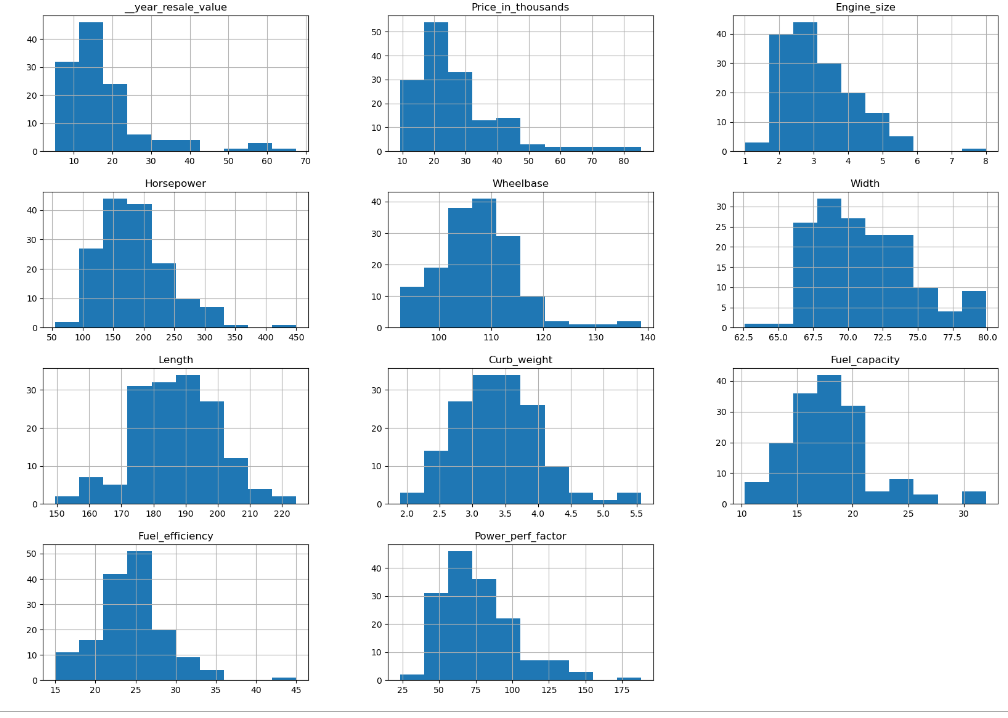
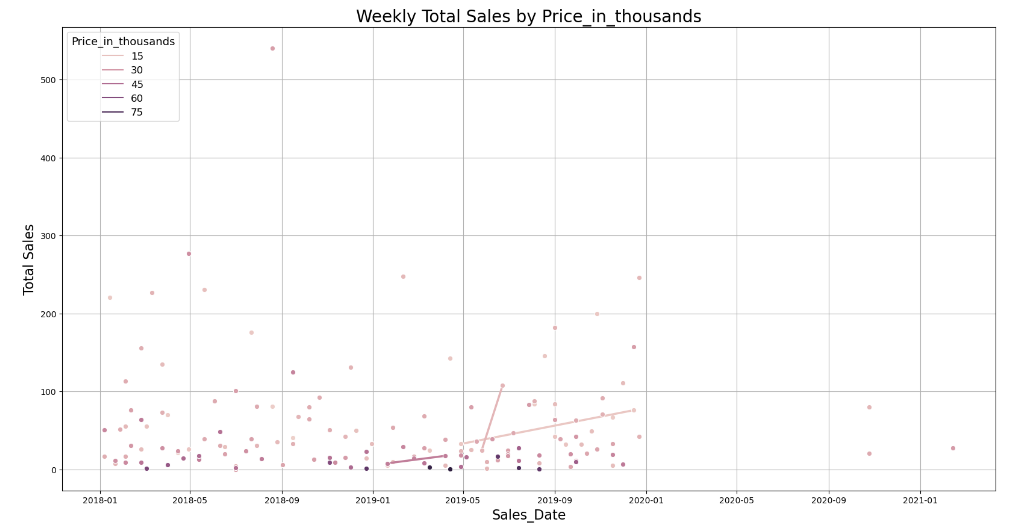
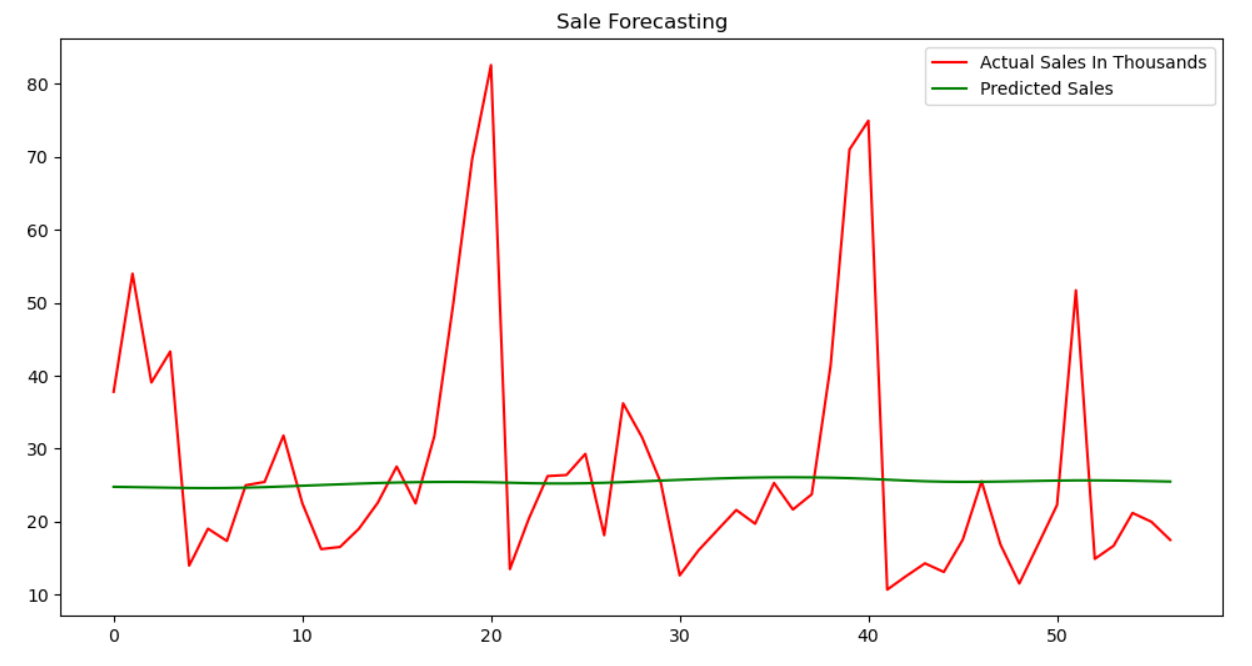
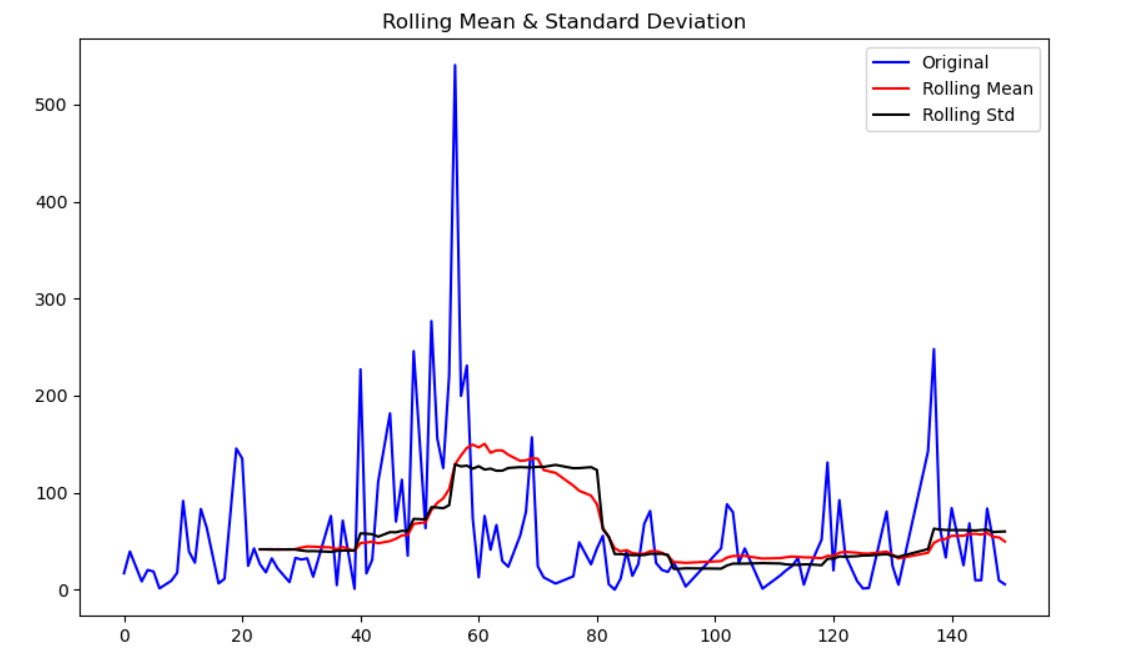
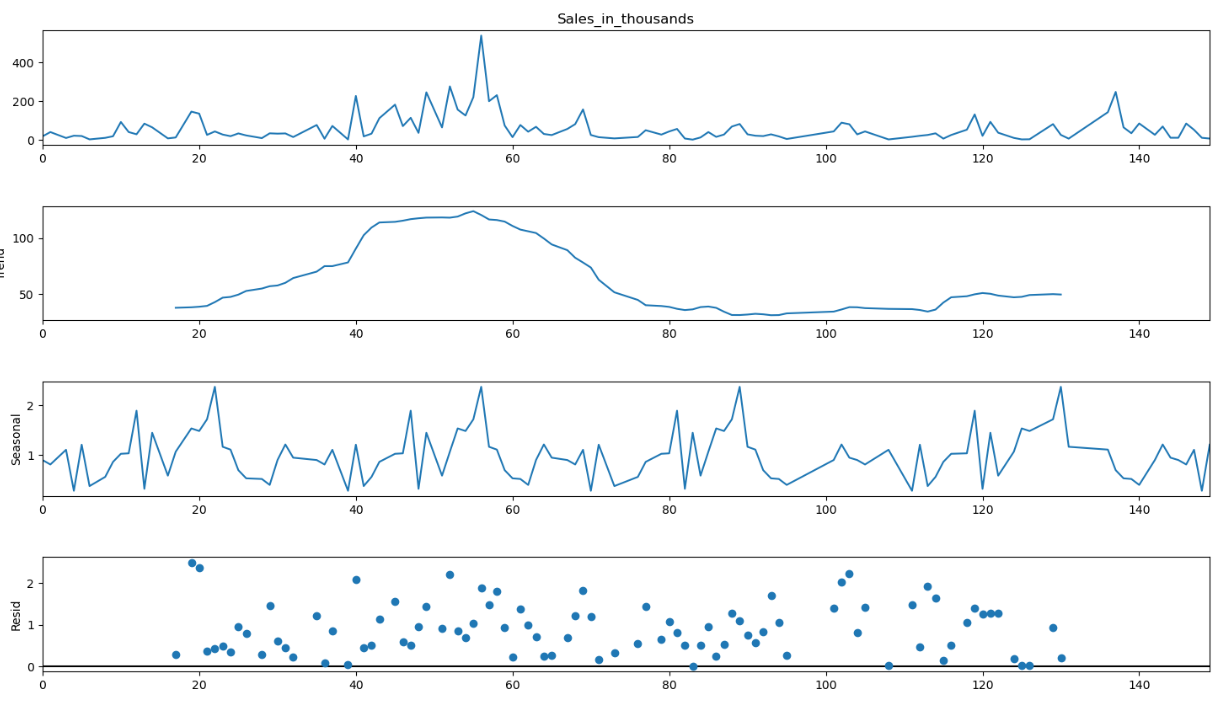
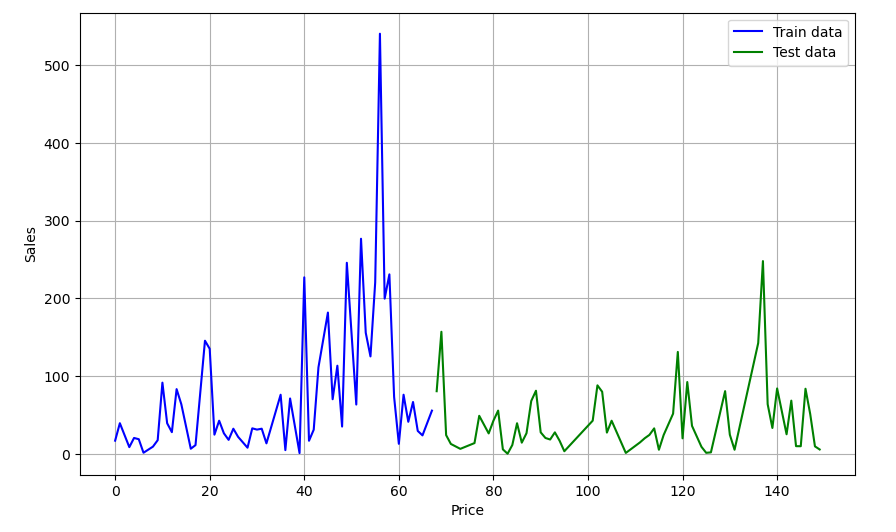
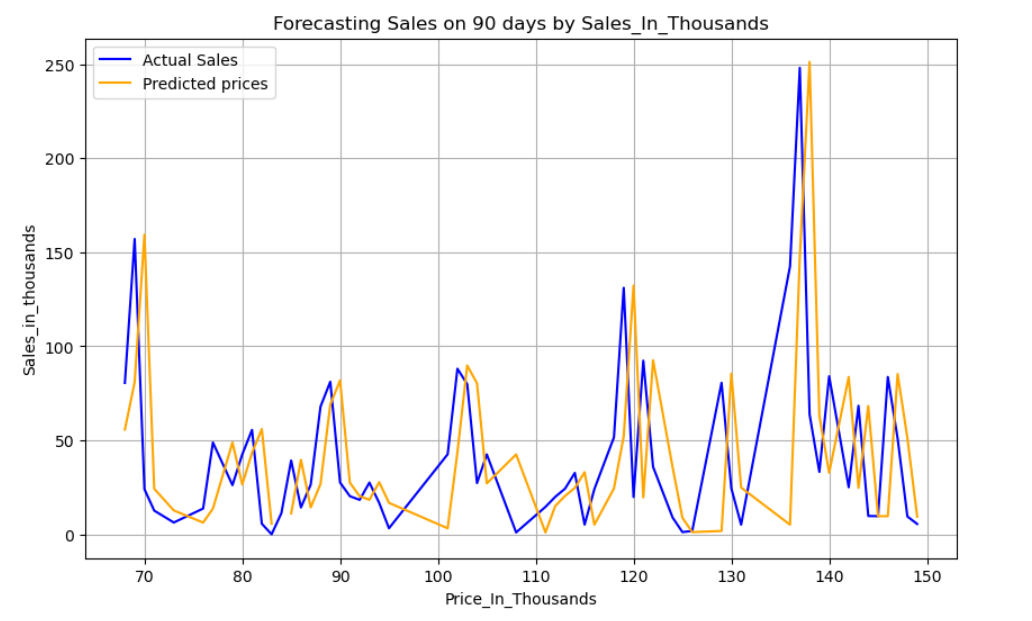
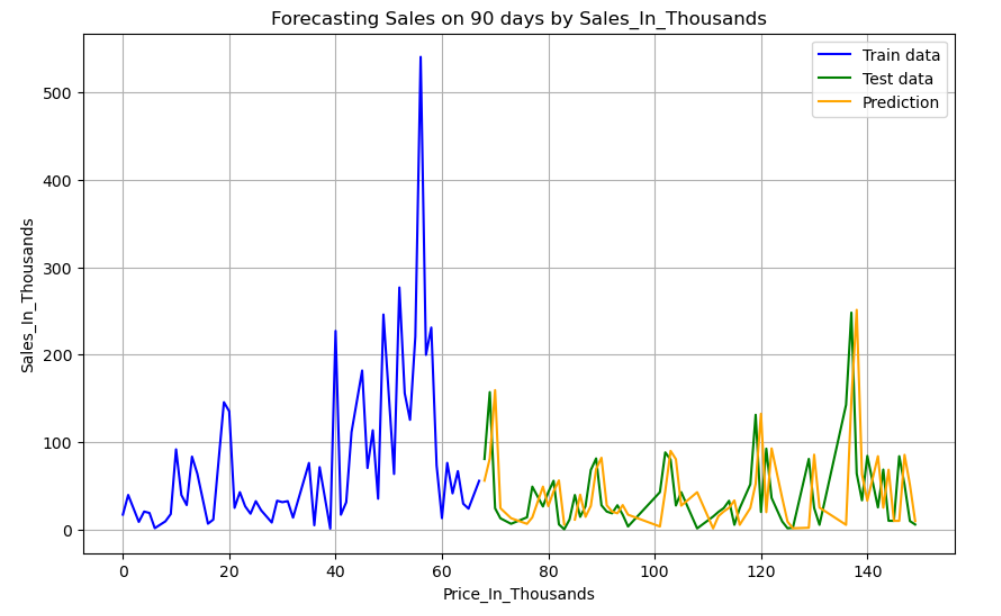
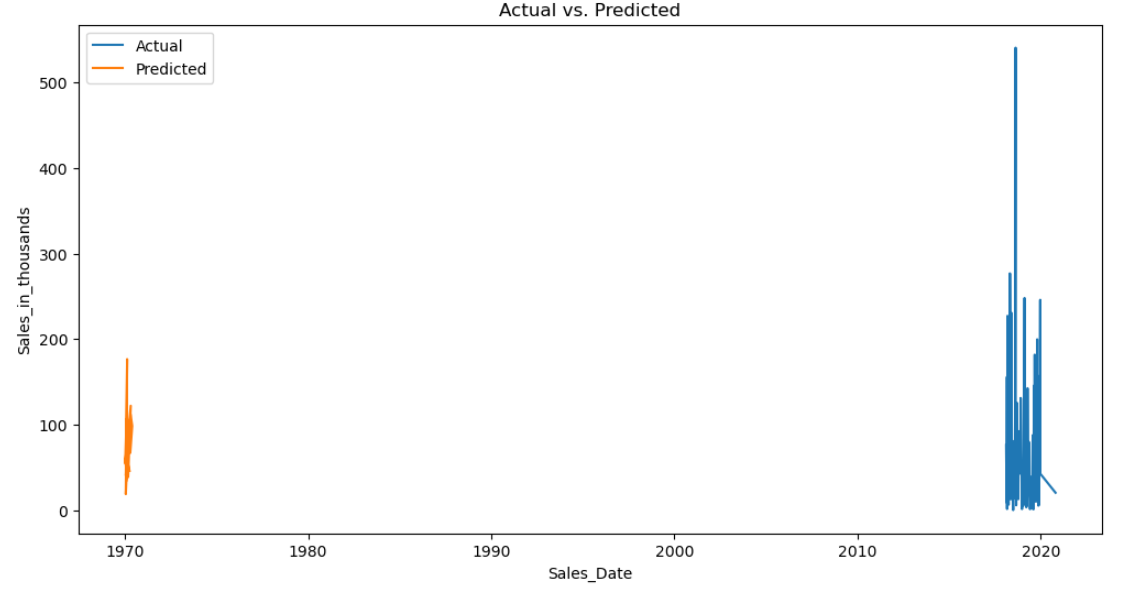
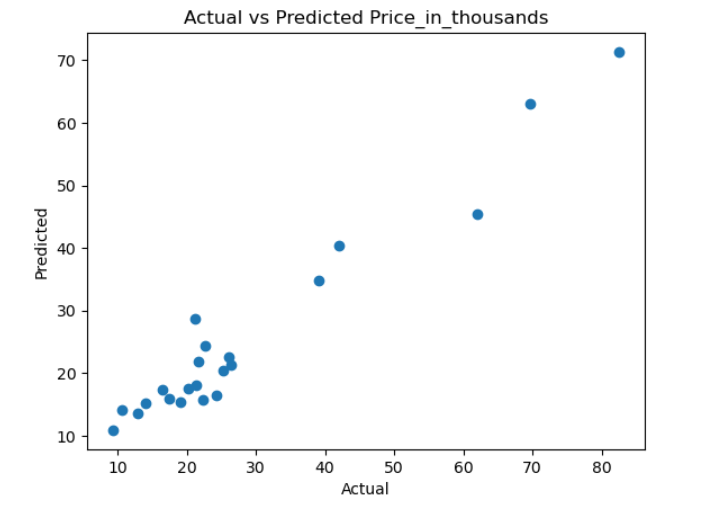
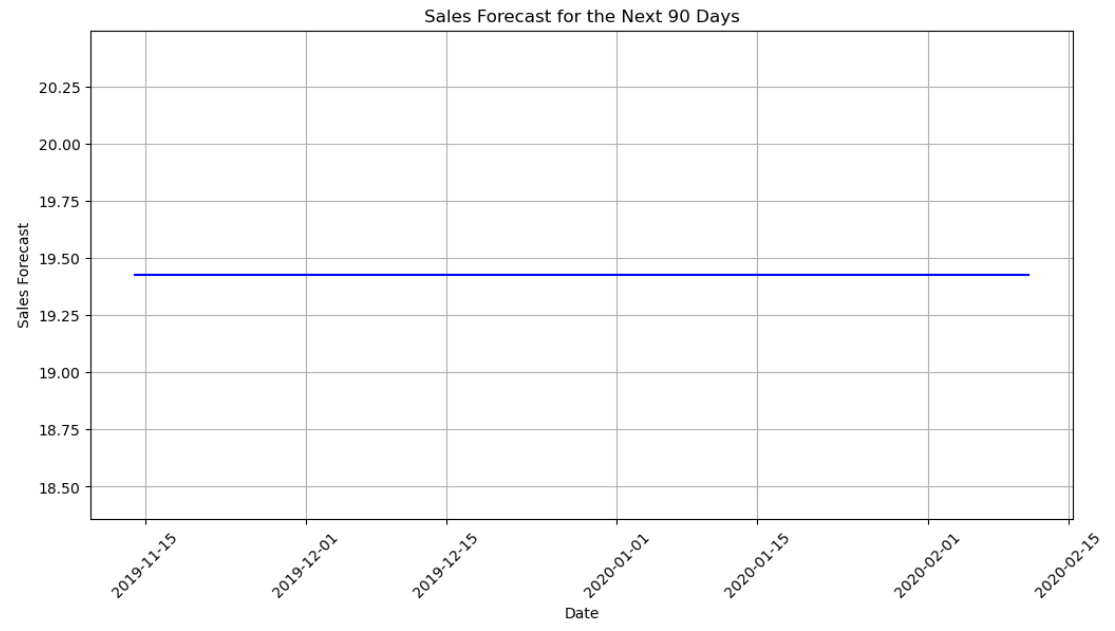
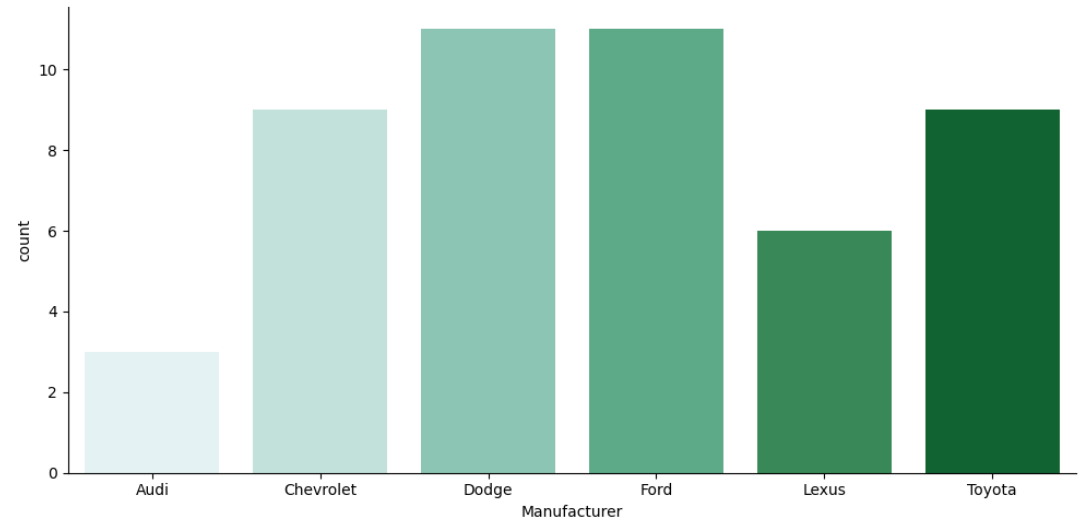
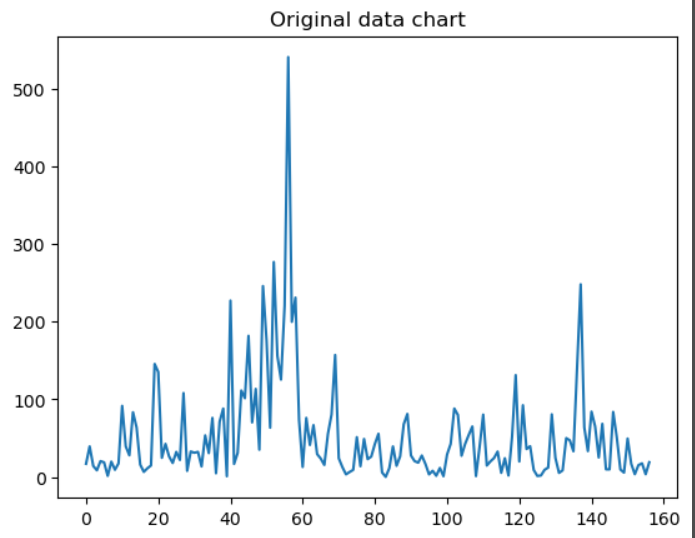
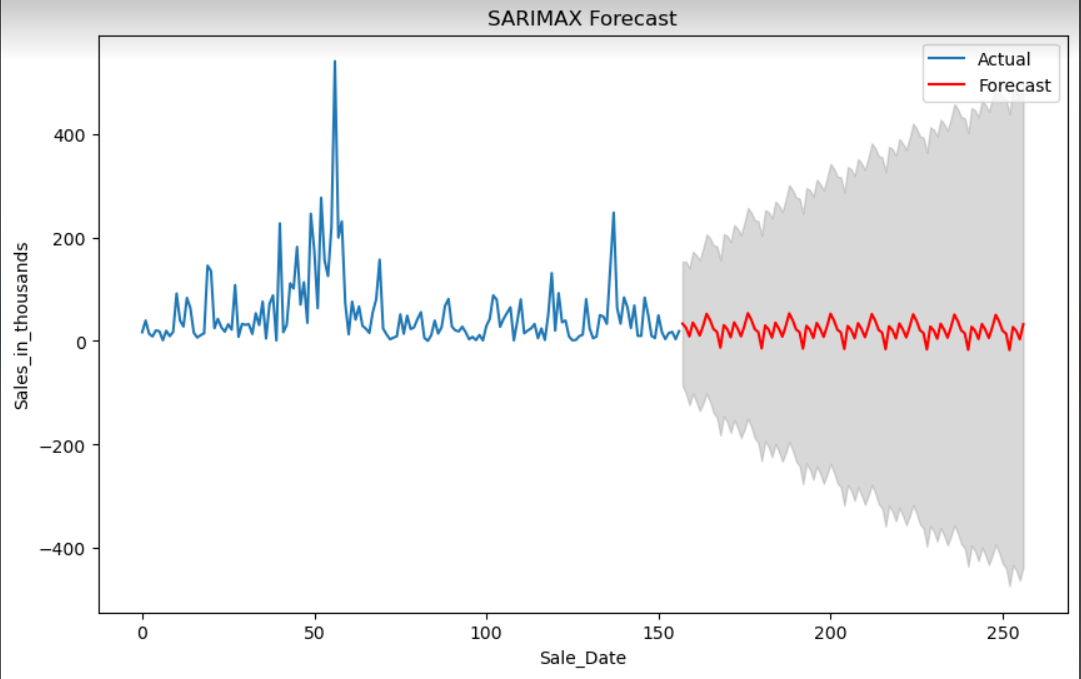
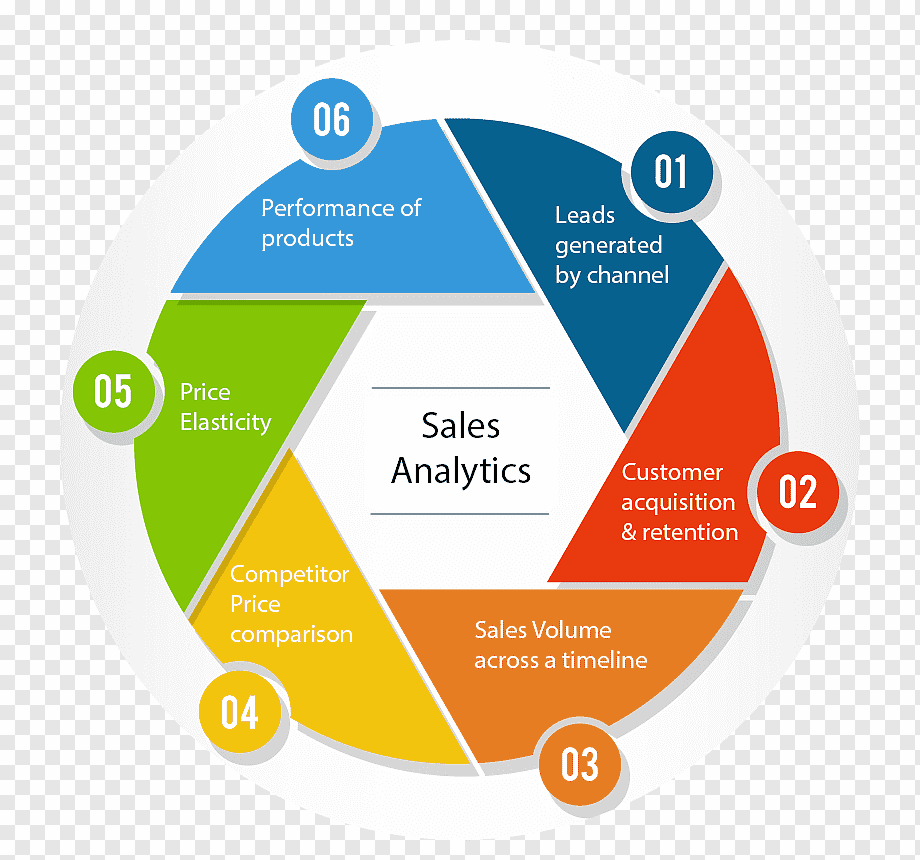
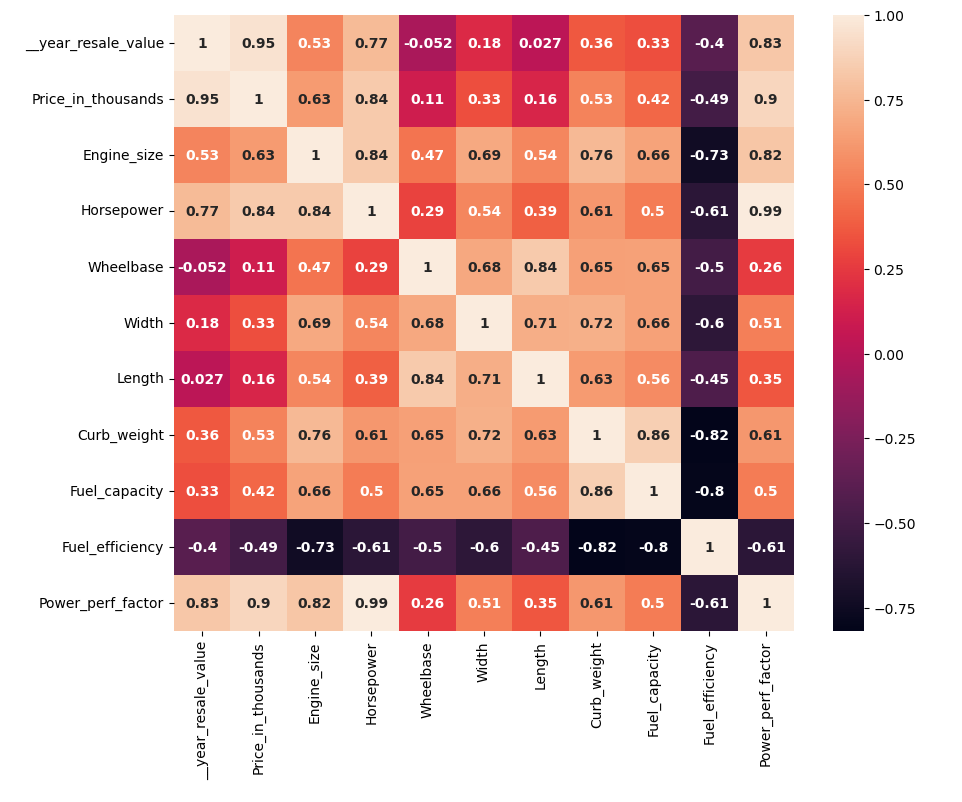

In [141]:
template = pn.template.FastListTemplate(
    title='Sales emission dashboard',
    sidebar=[
        pn.pane.Markdown("# Sales Emissions and Profit Change"),
        pn.pane.Markdown("#### Sales are the primary source of revenue for a business. Without sales, a company cannot generate the funds necessary to cover expenses, invest in growth, or generate profits. Sales provide the financial foundation for a business's operations and sustainability.Effective sales efforts drive business growth. By consistently acquiring new customers and expanding the customer base, sales contribute to the expansion of a company's market share and overall presence.Emphasizing sales as a core business function and investing in sales strategies, training, and technology enables businesses to maximize their potential, drive growth, and build long-term success."),
        pn.pane.PNG('D:Sales.png', sizing_mode='scale_both'),
        pn.pane.Markdown("## Settings"),
        __year_resale_value,
        heatmap_pane
    ],
    main=[
        pn.Row(
            pn.Column(
                Sales_Year,
                Sales_plot.panel(width=700),
                margin=(0, 25)
            ),
            Sales_table.panel(width=500)
        ),pn.Column(
                data_pane
            
        ),
        pn.Row(
            pn.Column(
                Sales_vs_price_thousands_scatterplot.panel(width=600),
                margin=(0, 25)
            ),
            pn.Column(
                Sales_Year_source,
                Sales_source_bar_plot.panel(width=600)
            )
        ),
        pn.Row(
            pn.Column(
                pn.pane.PNG('D:data_chart_table.png', sizing_mode='stretch_both', width=300, height=200),
                margin=(0, 10)
            ),
            pn.Column(
                pn.pane.PNG('D:Total_Sales_scatter.png', sizing_mode='stretch_both', width=300, height=200),
                margin=(0, 10)
            ),
        ),
        pn.Row(
            pn.Column(
                pn.pane.PNG('D:Predict_DeepAR_LSTM.png', sizing_mode='stretch_both', width=300, height=200),
                margin=(0, 10)
            ),
            pn.Column(
                pn.pane.PNG('D:Rolling_Standard_LSTM.png', sizing_mode='stretch_both', width=300, height=200),
                margin=(0, 10)
            ),
        ),
        pn.Row(
            pn.Column(
                pn.pane.PNG('D:Result_LSTM.png', sizing_mode='stretch_both', width=250, height=100),
                margin=(0, 10)
            ),
            pn.Column(
                pn.pane.PNG('D:Train_Test_model.png', sizing_mode='stretch_both', width=300, height=200),
                margin=(0, 10)
            ),
        ),
        pn.Row(
            pn.Column(
                pn.pane.PNG('D:Forecast_90_model.png', sizing_mode='stretch_both', width=250, height=100),
                margin=(0, 10)
            ),
            pn.Column(
                pn.pane.PNG('D:Forecast_90_model_2.png', sizing_mode='stretch_both', width=300, height=200),
                margin=(0, 10)
            ),
        ),
        pn.Row(
            pn.Column(
                pn.pane.PNG('D:XG_Predict_Actual.png', sizing_mode='stretch_both', width=250, height=100),
                margin=(0, 10)
            ),
            pn.Column(
                pn.pane.PNG('D:XG_Predict_Actual_2.png', sizing_mode='stretch_both', width=300, height=200),
                margin=(0, 10)
            ),
        ),
        pn.Row(
            pn.Column(
                pn.pane.PNG('D:XG_Result.png', sizing_mode='stretch_both', width=250, height=100),
                margin=(0, 10)
            ),
            pn.Column(
                pn.pane.PNG('D:Count_LSTM.png', sizing_mode='stretch_both', width=250, height=100),
                margin=(0, 10)
            ),
        ),
        pn.Row(
            pn.Column(
                pn.pane.PNG('D:Original_data_chart_sarimax.png', sizing_mode='stretch_both', width=250, height=100),
                margin=(0, 10)
            ),
            pn.Column(
                pn.pane.PNG('D:Result_Sarimax.png', sizing_mode='stretch_both', width=250, height=100),
                margin=(0, 10)
            ),
        ),
        
        
    ],
    accent_base_color="#FFA500",
    header_background="#00008B",
)
template.servable()


In [142]:
template.show()

Launching server at http://localhost:62369
